# 머신러닝

## 학생 결석 여부 확인 데이터
/kaggle/input/adp-p8/problem1.csv


성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
나이(age) 숫자: 15 - 22     
부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
학고횟수(failures)  숫자 : 1, 2, 3 else 4     
자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)    

### 1-1 데이터 EDA 및 시각화

In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/kaggle/input/adp-p8/problem1.csv')

df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


age, traveltime, freetime에 결측치 있는 것 확인 완료

In [14]:
df.describe()

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


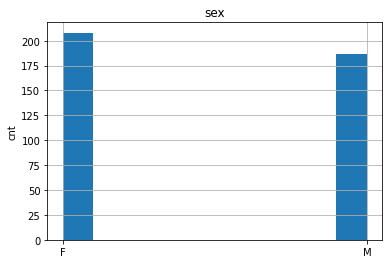

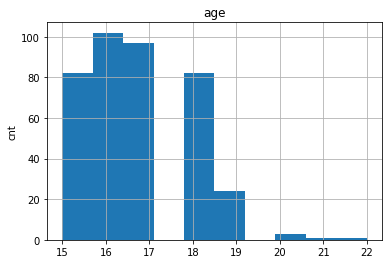

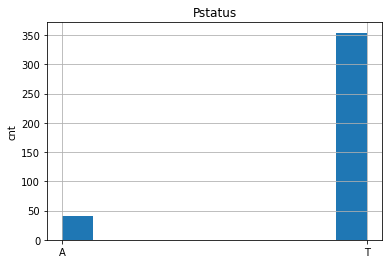

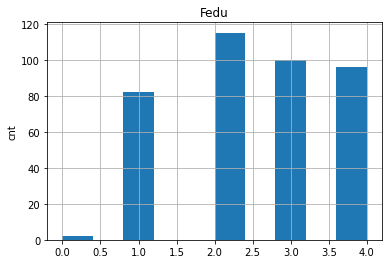

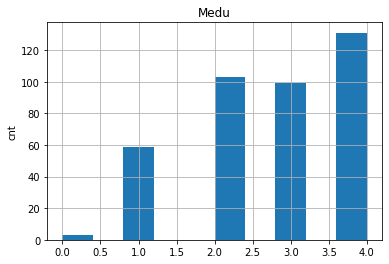

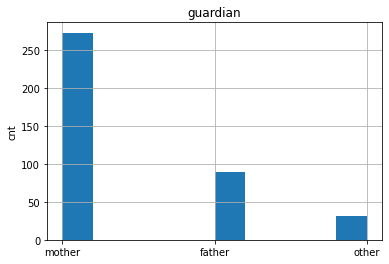

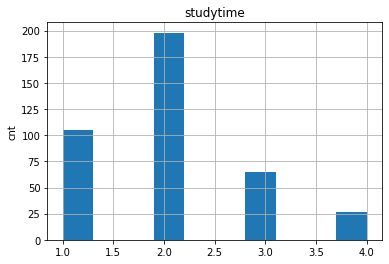

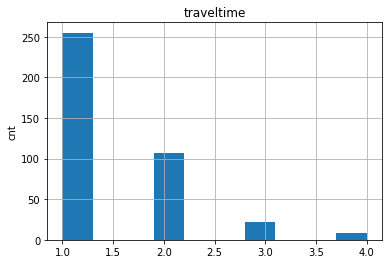

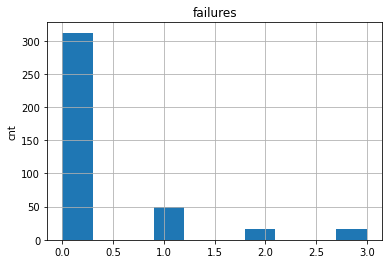

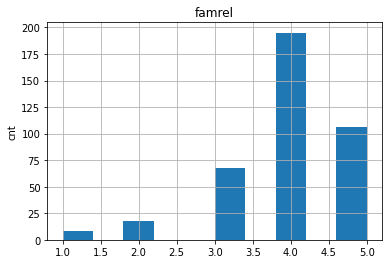

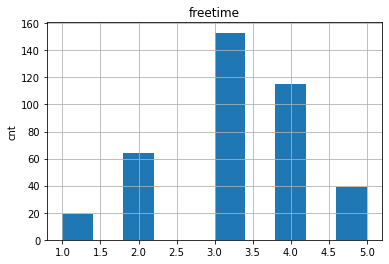

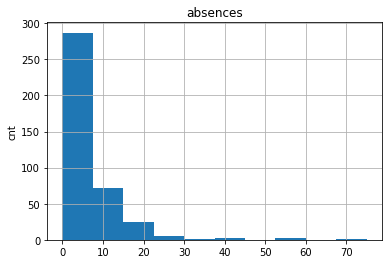

In [15]:
# 모두 연속형 변수가 아니므로, 히스토그램 하나씩 그리기
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.ylabel('cnt')
    plt.show()

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

In [16]:
# 결측치 확인
df.isnull().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

In [17]:
# 결측치를 최빈값으로 대체
for col in ['age', 'traveltime', 'freetime']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
df.isnull().sum()

sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64

혹시나 해서 이상치가 있을까 싶어 상자그림으로 확인

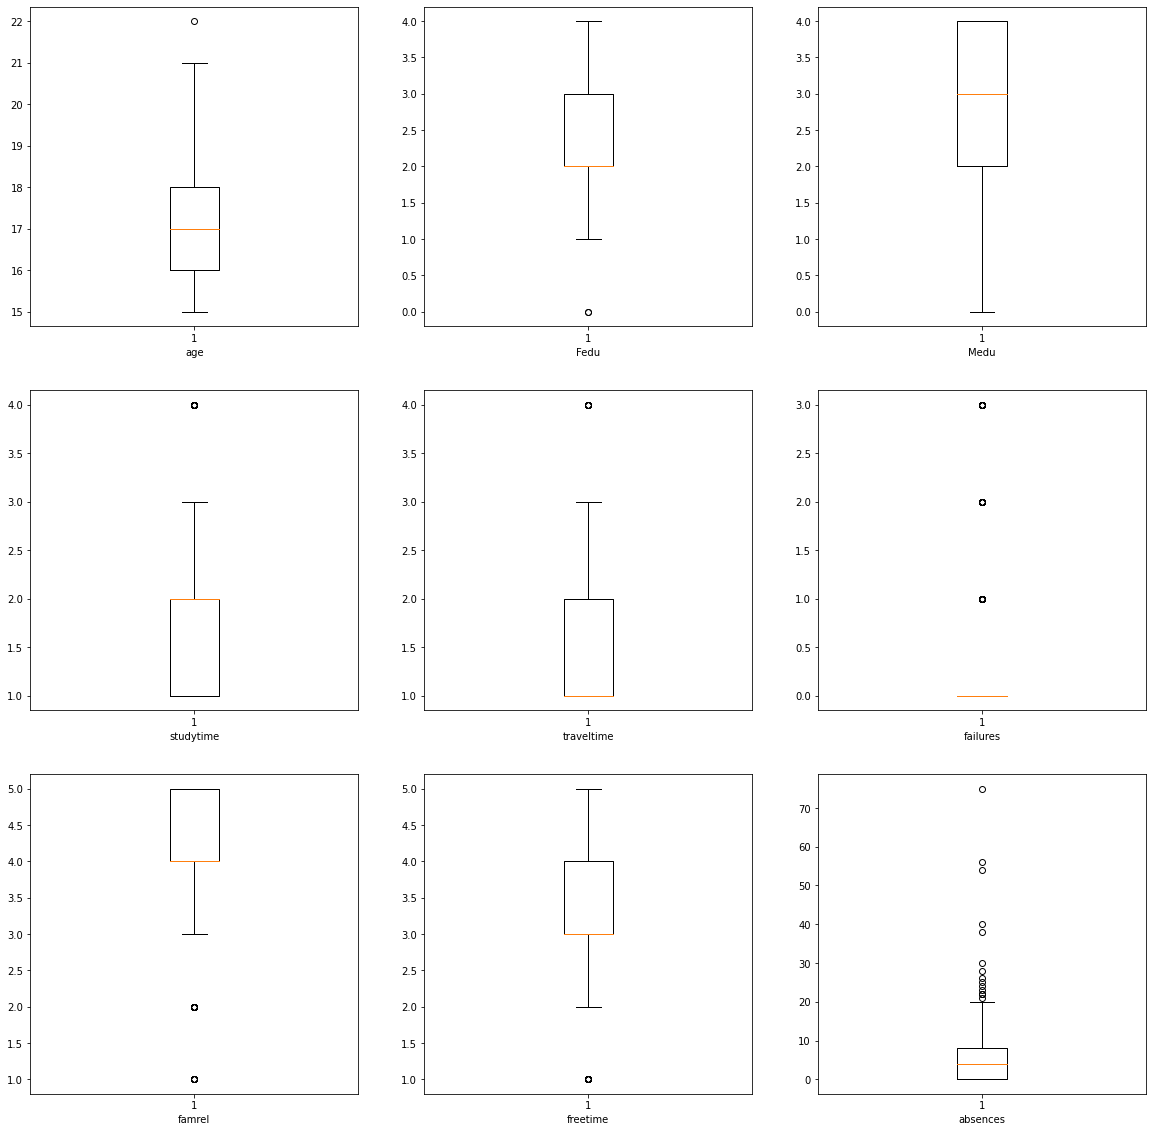

In [18]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['age'])
plt.xlabel('age')

plt.subplot(3, 3, 2)
plt.boxplot(df['Fedu'])
plt.xlabel('Fedu')

plt.subplot(3, 3, 3)
plt.boxplot(df['Medu'])
plt.xlabel('Medu')

plt.subplot(3, 3, 4)
plt.boxplot(df['studytime'])
plt.xlabel('studytime')

plt.subplot(3, 3, 5)
plt.boxplot(df['traveltime'])
plt.xlabel('traveltime')

plt.subplot(3, 3, 6)
plt.boxplot(df['failures'])
plt.xlabel('failures')

plt.subplot(3, 3, 7)
plt.boxplot(df['famrel'])
plt.xlabel('famrel')

plt.subplot(3, 3, 8)
plt.boxplot(df['freetime'])
plt.xlabel('freetime')

plt.subplot(3, 3, 9)
plt.boxplot(df['absences'])
plt.xlabel('absences')

plt.show()

상자그림을 봐도 이상치가 있다고는 판단할 수 없을 것 같다.

~이제 값이 문자인 변수들을 원핫인코딩해주자.~

값이 문자인 변수들은 라벨인코딩을 해준다.

In [32]:
# sex : F(0), M(1)
# Pstatus : T(0), A(1)
# guardian : mother(0), father(1), other(2)
df.replace(to_replace = ['F', 'M', 'T', 'A', 'mother', 'father', 'other'],
          value = [0, 1, 0, 1, 0, 1, 2], inplace = True)

In [33]:
df

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,0,18.0,1,4,4,0,2,2.0,0,4,3.0,6
1,0,17.0,0,1,1,1,2,1.0,0,5,3.0,4
2,0,15.0,0,1,1,0,2,1.0,3,4,3.0,10
3,0,15.0,0,2,4,0,3,1.0,0,3,2.0,2
4,0,16.0,0,3,3,1,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20.0,1,2,2,2,2,1.0,2,5,5.0,11
391,1,17.0,0,1,3,0,1,2.0,0,2,4.0,3
392,1,21.0,0,1,1,2,1,1.0,3,5,5.0,3
393,1,18.0,0,2,3,0,1,3.0,0,4,4.0,0


이제 상관계수를 통해 다중공선성이 의심되는 변수들이 있는지 확인한다.

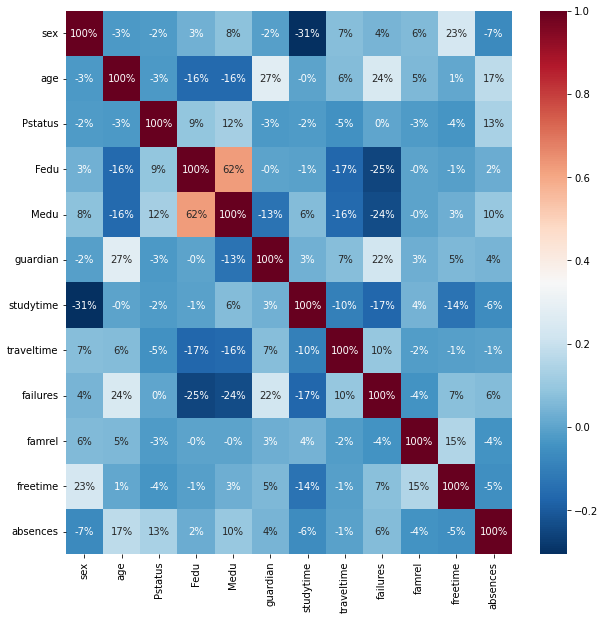

In [34]:
df_corr = df.corr(method = 'pearson')
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdBu_r', annot = True, fmt = '.0%')
plt.show()

Fedu와 Medu 변수가 상관관계가 높은데, absences에는 Medu가 미치는 영향이 크므로 Fedu 변수를 제거한다.

In [35]:
df.pop('Fedu')

0      4
1      1
2      1
3      2
4      3
      ..
390    2
391    1
392    1
393    2
394    1
Name: Fedu, Length: 395, dtype: int64

### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

결석일수 예측모델로 KNN과 랜덤포레스트를 제시한다.

**KNN**
* 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정으로 데이터를 분류하는 머신러닝 기법이다.
* KNN의 기본 원리
  * 학습데이터를 그대로 저장한 뒤 새로운 데이터 포인트에 대해 학습데이터에서 가장 가까운 k개의 데이터 포인트를 찾아 그것들로부터 새로운 데이터포인트의 범주를 라벨링
* 단순한 방식이지만 손글씨, 위성 이미지 분석 등 다양한 분류 및 회귀 문제에서 높은 예측력을 보인다.
* 또한, 비모수적인 방식을 사용하기 때문에 결정경계가 매우 불규칙한 분류 상황에서 종종 높은 예측성능을 보인다.

In [36]:
y = df.pop('absences')
x = df

In [42]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 731)

scaling은 할 수 있는 것이 없을 것 같아 생략한다.

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

평가 기준은 정확도(accuracy)로 한다.

결석이 많을 것으로 예측하는 학생에게 조치를 취하기 위해 예측한 것 중 얼마나 맞혔는지가 중요하다고 생각한다.

In [53]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

param_KNC = {"n_neighbors" : [3, 7, 11, 15, 19],
           "weights" : ['distance', 'uniform'],
           "metric" : ['monkowski', 'euclidean', 'mahalanobis', 'manhattan', 'cosine_similarity']}

gscv_KNC = GridSearchCV(estimator = KNC, param_grid = param_KNC, scoring = 'accuracy', cv = 3)

gscv_KNC.fit(x_train, y_train)

print('best params : ', gscv_KNC.best_params_)
print('accuracy : {:.4f}'.format(gscv_KNC.best_score_))

best params :  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
accuracy : 0.2572


In [59]:
# 시간까지 해서 성능 측정
import time

KNC_best = KNeighborsClassifier(n_neighbors = 19, metric = 'manhattan', weights = 'uniform')

KNC_start = time.time()
KNC_best.fit(x_train, y_train)
KNC_end = time.time()

print("학습 시간 : ", KNC_end - KNC_start, "초")

# 정확도
KNC_pred = KNC_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, KNC_pred)
test_prc = precision_score(y_test, KNC_pred, average = 'weighted')
test_rcll = recall_score(y_test, KNC_pred, average = 'weighted')
test_f1 = f1_score(y_test, KNC_pred, average = 'weighted')

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.0039370059967041016 초
정확도	26%
정밀도	14%
재현율	26%
F1	18%


In [62]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 300, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'entropy', 'min_samples_split': 9, 'n_estimators': 500}
accuracy : 0.2464


In [64]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'entropy', n_estimators = 500, min_samples_split = 9)

import time

rf_start_time = time.time()
rf_best.fit(x_train, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")

# 정확도
rf_pred = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred, average = 'weighted')
test_rcll = recall_score(y_test, rf_pred, average = 'weighted')
test_f1 = f1_score(y_test, rf_pred, average = 'weighted')

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.9436907768249512 초
정확도	29%
정밀도	17%
재현율	29%
F1	20%


딱봐도 여부를 예측하는 모델은 오버피팅 된듯

주성분 분석을 통해 필요한 애들만 남겨야 겠다

In [65]:
# 주성분 분석을 통한 차원 축소 진행

# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_fit = pca.fit(x)

print('고윳값 : ', pca.singular_values_)
print('분산 설명력 : ', pca.explained_variance_ratio_)

고윳값 :  [27.04242526 21.28754902 20.85641457 17.95189569 15.88146647 13.52655896]
분산 설명력 :  [0.26127237 0.16190249 0.15541091 0.1151391  0.09011216 0.06536976]


6개의 주성분으로 전체 분산의 약 83% 설명이 가능하므로 차원축소 진행

* 결과적으로, 11개의 설명변수에서 6개의 설명변수로 차원축소

In [69]:
pca = PCA(n_components = 6)
principal_x = pd.DataFrame(pca.fit_transform(x), columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
principal_x.describe()

,pc1,pc2,pc3,pc4,pc5,pc6
count,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02
mean,-1.439074e-16,7.195369e-17,1.618958e-16,2.181096e-16,1.798842e-17,-3.597685e-17
std,1.362378e+00,1.072451e+00,1.050731e+00,9.044034e-01,8.000967e-01,6.814582e-01
min,-2.415099e+00,-2.591702e+00,-2.880945e+00,-2.404111e+00,-2.011165e+00,-1.446429e+00
25%,-1.070294e+00,-8.237087e-01,-6.739999e-01,-6.074071e-01,-5.244754e-01,-4.580429e-01
50%,-1.288142e-01,-2.291375e-02,4.205412e-03,-5.519701e-02,-5.446592e-02,-1.439230e-01
75%,8.307310e-01,7.876679e-01,7.312874e-01,5.220613e-01,5.082106e-01,2.910648e-01
max,5.426045e+00,3.250685e+00,3.060911e+00,3.157854e+00,2.520609e+00,2.856865e+00


In [70]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size = 0.3, random_state = 731)

In [71]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

param_KNC = {"n_neighbors" : [3, 7, 11, 15, 19],
           "weights" : ['distance', 'uniform'],
           "metric" : ['monkowski', 'euclidean', 'mahalanobis', 'manhattan', 'cosine_similarity']}

gscv_KNC = GridSearchCV(estimator = KNC, param_grid = param_KNC, scoring = 'accuracy', cv = 3)

gscv_KNC.fit(x_train, y_train)

print('best params : ', gscv_KNC.best_params_)
print('accuracy : {:.4f}'.format(gscv_KNC.best_score_))

best params :  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
accuracy : 0.2464


In [72]:
# 시간까지 해서 성능 측정
import time

KNC_best = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean', weights = 'uniform')

KNC_start = time.time()
KNC_best.fit(x_train, y_train)
KNC_end = time.time()

print("학습 시간 : ", KNC_end - KNC_start, "초")

# 정확도
KNC_pred = KNC_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, KNC_pred)
test_prc = precision_score(y_test, KNC_pred, average = 'weighted')
test_rcll = recall_score(y_test, KNC_pred, average = 'weighted')
test_f1 = f1_score(y_test, KNC_pred, average = 'weighted')

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.002628803253173828 초
정확도	29%
정밀도	18%
재현율	29%
F1	21%


In [74]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 300, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'entropy', 'min_samples_split': 9, 'n_estimators': 100}
accuracy : 0.2464


In [76]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'entropy', n_estimators = 100, min_samples_split = 9)

import time

rf_start_time = time.time()
rf_best.fit(x_train, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")

# 정확도
rf_pred = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred, average = 'weighted')
test_rcll = recall_score(y_test, rf_pred, average = 'weighted')
test_f1 = f1_score(y_test, rf_pred, average = 'weighted')

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.29125380516052246 초
정확도	29%
정밀도	17%
재현율	29%
F1	19%


### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

## 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

# 통계분석

# 2
## 광고횟수와 광고비에 따른 매출액의 데이터이다. 
/kaggle/input/adp-p8/problem2.csv

### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

### 2-2 회귀식이 유의한지 판단

# 3
## A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 귀무가설과 대립가설을 세워라 

* 귀무가설 : 두 제품의 평균은 차이가 있다고 말할 수 없다.
* 대립가설 : 두 제품의 평균은 차이가 있다고 말할 수 있다.

### 3-2 두 평균이 차이가 있는지 검정하라

각각 몇개인지 몰라 그냥 한다.

In [ ]:
import numpy as np

m_a = 5.7
m_b = 5.6
s_a = 0.03
s_b = 0.04
s_p_squared = (s_a**2 + s_b**2)

z = 1.65

t = (m_a - m_b)/np.sqrt(s_p_squared)

print(t)

t 검정통계량이 z(0.05)=1.65보다 크므로 유의수준 0.05 하에서 귀무가설을 기각하고 대립가설을 채택한다.

즉, A, B 생산라인의 제품 평균은 차이가 있다고 말할 수 있다.

# 4
## 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라
![image](https://github.com/Datamanim/datarepo/blob/main/adp/24/problem4.png?raw=true)

In [ ]:
print(370/(370+10))

# 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]     
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [ ]:
import pandas as pd
import numpy as np
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

x = pd.Series(data)

mean = x.mean()
std = np.std(x)

print('mean : ', mean)
print('std : ', std)

In [ ]:
lower_bound = mean - 1.96 * (std/3)
upper_bound = mean + 1.96 * (std/3)

print(lower_bound, upper_bound)

### sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [ ]:
lower_bound_knowing_sigma = mean - 1.96 * 0.04
upper_bound_knowing_sigma = mean + 1.96 * 0.04

print(lower_bound_knowing_sigma, upper_bound_knowing_sigma)